## White -box attack

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
%matplotlib inline


nets = {
#         'resnet56_cifar10': 'cifar10',
#         'resnet56_cifar10_fgsm': 'cifar10',
#         'resnet56_cifar10_pgd': 'cifar10',
    
# #         'transfer_resnet56_fgsm_nat': 'cifar10',
#         'transfer_resnet56_nat_fgsm': 'cifar10',
#         'transfer_resnet56_fgsm_fgsm': 'cifar10',
#         'transfer_resnet56_nat_nat': 'cifar10',
    
#         'densenet121_cifar10': 'cifar10',
        'densenet121_cifar10_fgsm': 'cifar10',
        'densenet121_cifar10_pgd': 'cifar10',
        
        
        
    
#         'transfer_densenet121_fgsm_nat': 'cifar10',
        'transfer_densenet121_nat_fgsm' : 'cifar10',
        'transfer_densenet121_fgsm_fgsm' : 'cifar10',
#         'transfer_densenet121_nat_nat': 'cifar10',
    
#         'transfer_resnet56_pgd_nat': 'cifar10',
#         'transfer_resnet56_nat_pgd': 'cifar10',
#         'transfer_resnet56_pgd_pgd': 'cifar10',
       
    
        'transfer_densenet121_pgd_nat': 'cifar10',
        'transfer_densenet121_nat_pgd' : 'cifar10',
        'transfer_densenet121_pgd_pgd' : 'cifar10',
        
       
#         'resnet56_cifar100': 'cifar100',
#         'resnet56_cifar100_fgsm': 'cifar100',
#         'resnet56_cifar100_pgd': 'cifar100',
               
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100',
        

        
}

transfer_method= {'nat','pgd','fgsm'}
trained_method= {'nat','pgd','fgsm'}
attack_results = {}

In [92]:
for net,data in nets.items():
    model_path = '../experiments_results/attack_results_pgd_7/white_box_attacks_pgd_7_'+net+'.json'
    with open(model_path,'r+') as json_data:
        attack_results[net] = json.load(json_data)
    
    

In [93]:
data_table = {}
for name,dic in attack_results.items():
    vals = [0] * 3
    for key,value in dic.items():
        key = key.split('_')
        if key[-1] == 'clean':
            vals[0] = value
        elif key[-1] == 'fgsm':
            vals[1] = value
        elif key[-1] == 'pgd':
            vals[2] = value
    data_table[name] = vals


In [94]:
a = pd.DataFrame.from_dict(data_table).transpose()
a.columns= ['clean','fgsm','pgd']
# print(a.to_latex())
a=a.sort_values('clean',ascending = False)

<Figure size 1152x720 with 0 Axes>

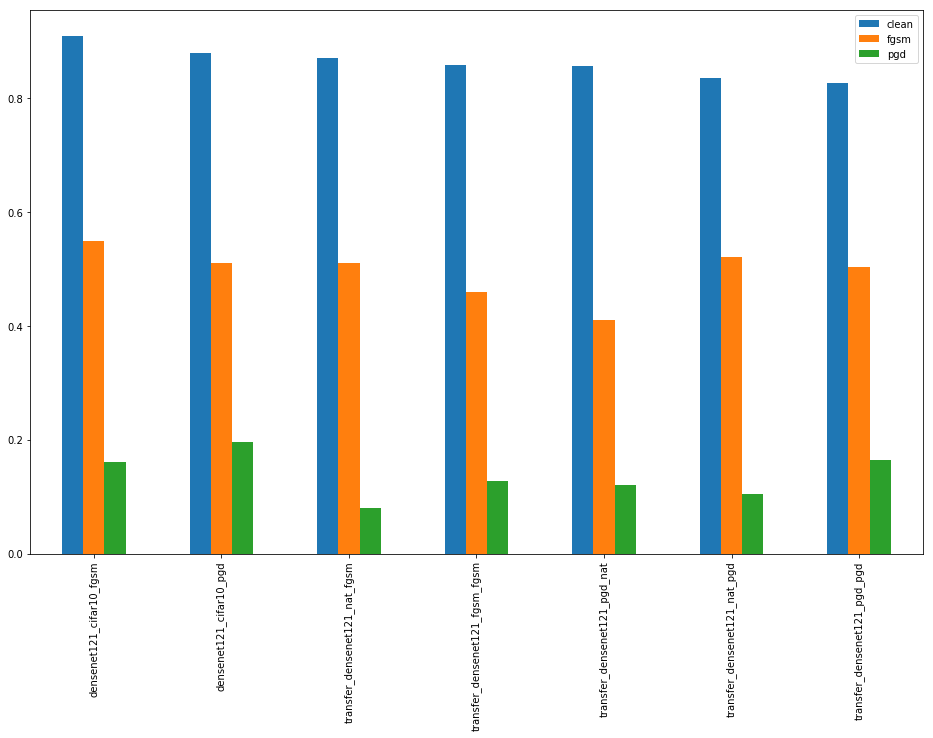

In [95]:
plt.figure(figsize=(16,10))
a.plot(figsize=(16,10), kind='bar')

## Black-box attacks

In [51]:
black_box_path = '../experiments_results/attack_results/black_box_results_e_0125.json'
with open(black_box_path,'r+') as json_data:
    black_box_results = json.load(json_data)

In [52]:
black_box_results['cifar10']

[{'resnet56_cifar10_attacked_by_fgsm_acc': 0.5136000000000001,
  'resnet56_cifar10_fgsm_attacked_by_fgsm_acc': 0.7877999999999998,
  'densenet121_cifar10_fgsm_attacked_by_fgsm_acc': 0.7964,
  'transfer_densenet121_fgsm_fgsm_attacked_by_fgsm_acc': 0.7181000000000001,
  'transfer_densenet121_fgsm_nat_attacked_by_fgsm_acc': 0.6553,
  'transfer_densenet121_nat_fgsm_attacked_by_fgsm_acc': 0.6537999999999998,
  'transfer_resnet56_nat_fgsm_attacked_by_fgsm_acc': 0.6850999999999999,
  'transfer_resnet56_fgsm_fgsm_attacked_by_fgsm_acc': 0.7586000000000002,
  'transfer_resnet56_fgsm_nat_attacked_by_fgsm_acc': 0.7180000000000001}]